In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns;sns.set(color_codes=True)
import numpy as np
color = sns.color_palette("tab10")

In [4]:
df_wine = pd.read_csv("../data/df_wine.csv")
df_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color,tipo_calidad
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0,Mediana
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0,Mediana
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0,Mediana
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0,Buena
4,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,0,Mediana


In [6]:
wine_analysis = pd.DataFrame(data=df_wine, 
                            columns = ['alcohol', 'density', 'chlorides','fixed acidity','volatile acidity', 'citric acid','quality','tipo_calidad'])
wine_analysis.head()

,alcohol,density,chlorides,fixed acidity,volatile acidity,citric acid,quality,tipo_calidad
0,9.4,0.9978,0.076,7.4,0.70,0.00,5,Mediana
1,9.8,0.9968,0.098,7.8,0.88,0.00,5,Mediana
2,9.8,0.9970,0.092,7.8,0.76,0.04,5,Mediana
3,9.8,0.9980,0.075,11.2,0.28,0.56,6,Buena
4,9.4,0.9978,0.075,7.4,0.66,0.00,5,Mediana


Figure 8: Correlación usando el mapa de calor de Seaborn


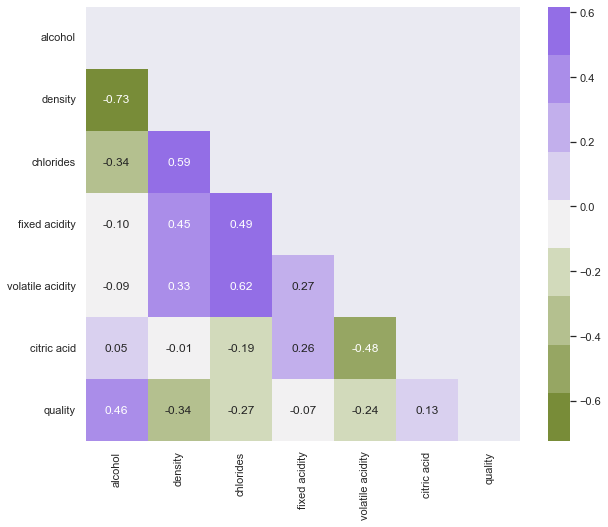

In [7]:
sns.set_style("dark")
plt.figure(figsize = (10,8))
sns.set_context("notebook", font_scale= 1.0)
column = wine_analysis.columns.tolist()
mcorr = wine_analysis[column].corr()
mask = np.zeros_like(mcorr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
cmap=sns.diverging_palette(100, 275, s=80, l=55, n=9)
g = sns.heatmap(mcorr, mask=mask, cmap=cmap, square=True, annot=True, fmt='0.2f')
print("Figure 8: Correlación usando el mapa de calor de Seaborn")

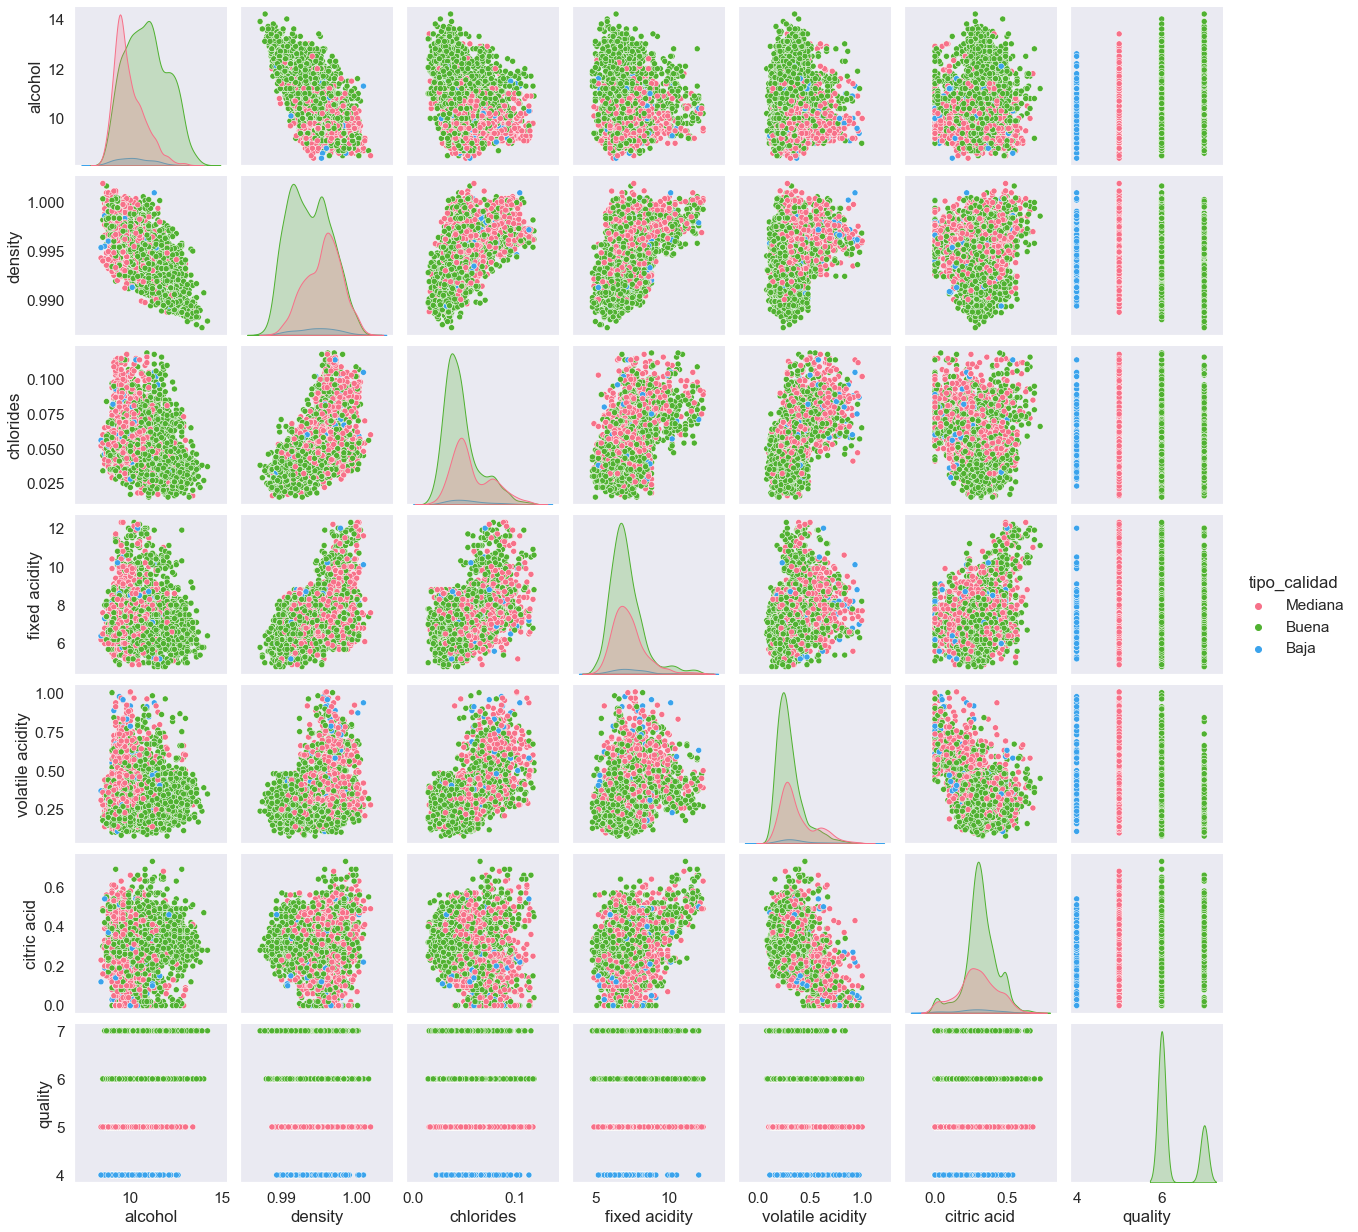

In [9]:
sns.pairplot(wine_analysis, hue='tipo_calidad',palette="husl") 
plt.show()

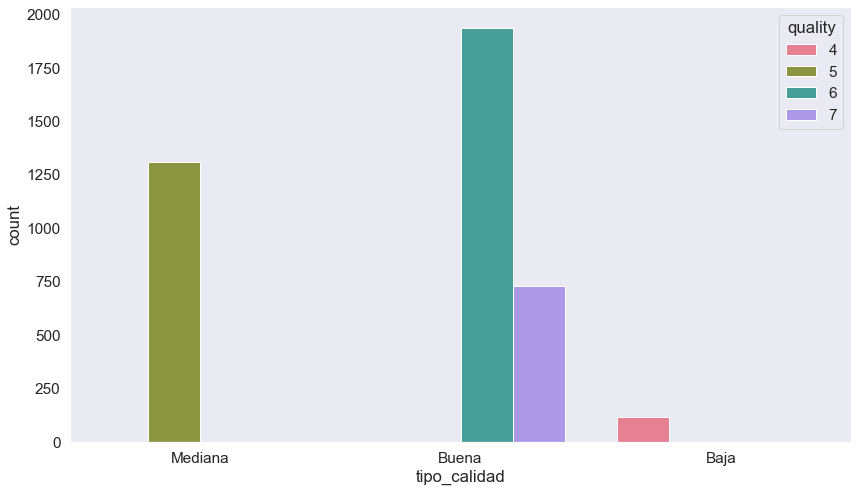

In [10]:
figure = plt.figure(figsize = (14,8))
sns.set_context("notebook", font_scale= 1.4)
sns.countplot(x="tipo_calidad",hue = 'quality', palette="husl",data=wine_analysis)
plt.show()

In [21]:
#las calidades más representadas son los vinos de calidad 4,5,6 y 7
calidad_4 = pd.DataFrame(data=wine_analysis[wine_analysis.quality==4], 
                     columns=['chlorides', 'density'])
calidad_5 = pd.DataFrame(data=wine_analysis[wine_analysis.quality==5], 
                     columns=['chlorides', 'density'])
calidad_6= pd.DataFrame(data=wine_analysis[wine_analysis.quality==6], 
                     columns=['chlorides', 'density'])
calidad_7 = pd.DataFrame(data=wine_analysis[wine_analysis.quality==7], 
                     columns=['chlorides', 'density'])

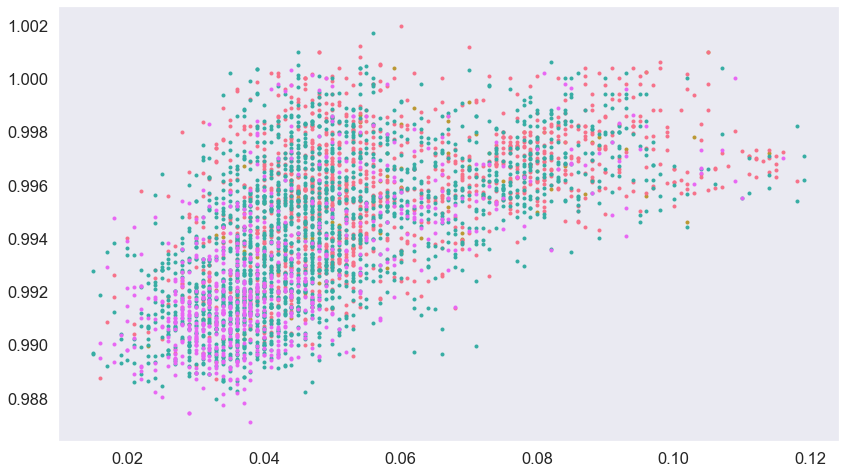

In [22]:
#Se graficarán las 3 calidades para ver qué tan separadas están
figure = plt.figure(figsize = (14,8))
sns.set_context("notebook", font_scale= 1.5)
colores = sns.color_palette(palette='husl', n_colors=6, desat=None)#obtener los colores usados anteriormente
plt.plot(calidad_4['chlorides'],calidad_4['density'], '.', color = colores[1], label='4')
plt.plot(calidad_5['chlorides'],calidad_5['density'], '.', color = colores[0], label='5')
plt.plot(calidad_6['chlorides'],calidad_6['density'], '.', color = colores[3], label='6')
plt.plot(calidad_7['chlorides'],calidad_7['density'], '.', color = colores[5], label='7')
plt.show()

In [15]:
def minimos_cuadrados(x,y):  
    m = len(x) #len() mide el largo del vector
    sumax = np.sum(x)
    sumay = np.sum(y)
    sumax2 = np.sum(x**2) # cada termino al cuadrado se suma
    sumaxy = np.dot(x,y) # producto punto entre x e y
    a = (m*sumaxy - sumax*sumay) / (m*sumax2 - sumax**2)
    b = (sumax2*sumay - sumaxy*sumax) / (m*sumax2 - sumax**2)
    return a,b

In [29]:
#obtener el ajuste de mínimos cuadrados para los 4 conjuntos de datos
a4,b4 = minimos_cuadrados(calidad_4['chlorides'],calidad_4['density'])
a5,b5 = minimos_cuadrados(calidad_5['chlorides'],calidad_5['density'])
a6,b6 = minimos_cuadrados(calidad_6['chlorides'],calidad_6['density'])
a7,b7 = minimos_cuadrados(calidad_7['chlorides'],calidad_7['density'])

x = np.linspace(0.02, 0.12)
y4 = a4*x + b4
y5 = a5*x + b5 
y6 = a6*x + b6
y7 = a7*x + b7

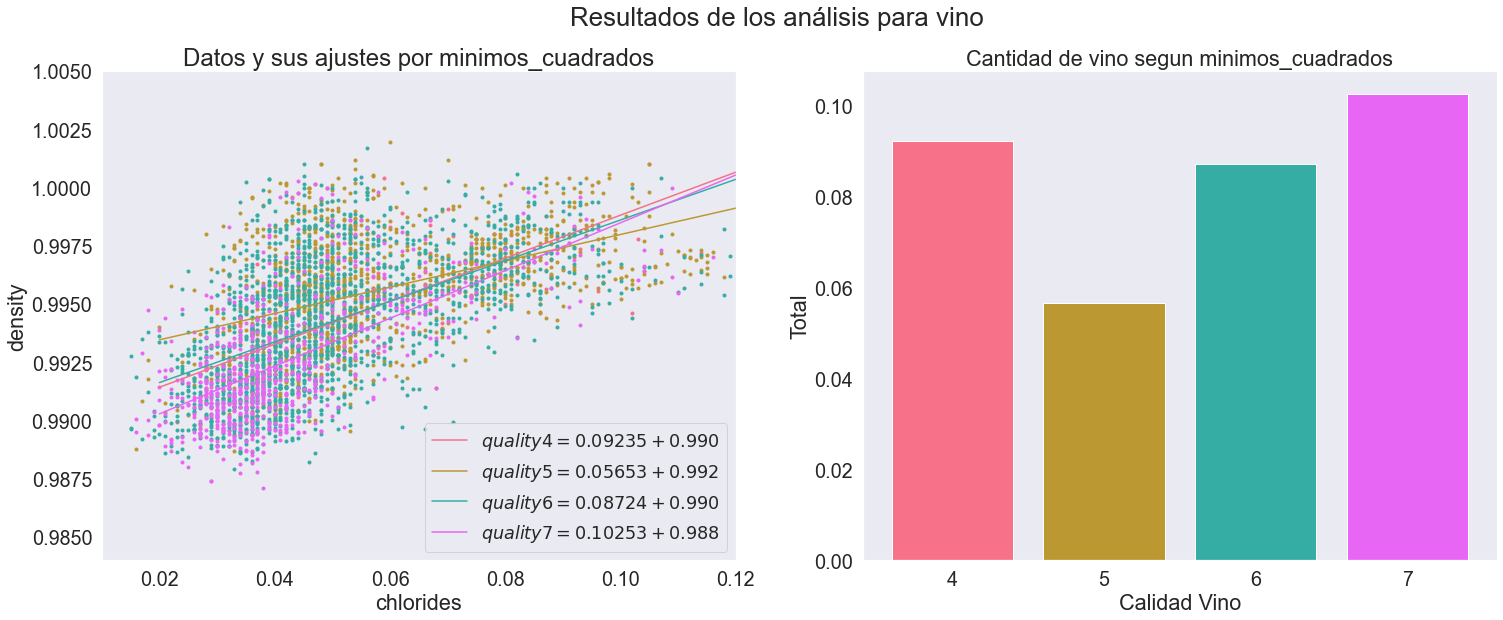

In [35]:
plt.figure(figsize=(25,9))#figura de tamaño 15x5
plt.suptitle("Resultados de los análisis para vino")#titulo general
plt.subplot(121) #figura con 2 gráficos. 1º gráfico

#graficar las nubes de puntos
sns.set_context("notebook", font_scale= 2.0)
plt.title('Datos y sus ajustes por minimos_cuadrados')
plt.plot(calidad_4['chlorides'],calidad_4['density'], '.', color = colores[0], label='')
plt.plot(calidad_5['chlorides'],calidad_5['density'], '.', color = colores[1], label='')
plt.plot(calidad_6['chlorides'],calidad_6['density'], '.', color = colores[3],label='')
plt.plot(calidad_7['chlorides'],calidad_7['density'], '.', color = colores[5],label='')

#graficar los ajustes
sns.set_context("notebook", font_scale= 1.6)
plt.plot(x,y4, '-', color = colores[0],label='$quality4 = %0.5f + %0.3f  $'%(a4,b4))
plt.plot(x,y5, '-', color = colores[1],label='$quality5 = %0.5f + %0.3f  $'%(a5,b5))
plt.plot(x,y6, '-', color = colores[3],label='$quality6 = %0.5f + %0.3f  $'%(a6,b6))
plt.plot(x,y7, '-', color = colores[5],label='$quality7 = %0.5f + %0.3f  $'%(a7,b7))
plt.xlabel('chlorides')#etiquetar correctamente los gráficos
plt.ylabel('density')
plt.legend() #agregar leyenda al gráfico
plt.xlim(0.01, 0.12)#ordenar el rango a mostrar
plt.ylim(0.984,1.005)

sns.set_context("notebook", font_scale=1.8)#2º gráfico
plt.subplot(122)
plt.title('Cantidad de vino segun minimos_cuadrados')
plt.bar([4,5,6,7], [a4,a5,a6,a7], color = [colores[0],colores[1], colores[3], colores[5]])
plt.xlabel('Calidad Vino')
plt.ylabel('Total')
plt.xticks([4,5,6,7])
plt.show()

In [57]:
df_wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color,tipo_calidad
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,Red,Mediana
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,Red,Mediana
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,Red,Mediana
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,Red,Buena
4,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5,Red,Mediana
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4089,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,White,Buena
4090,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,White,Mediana
4091,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,White,Buena
4092,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,White,Buena


In [17]:
df_wine['color'] = np.where(df_wine['color'], 'White', 'Red')
df_wine.replace({'color': {0: "White", 1: "Red"}},  inplace = True)

In [18]:
df_analytic_wine_total=df_wine
df_analytic_wine_total.to_csv('data/analytic_wine_total.csv', index = False)

In [19]:
df_analytic_wine_total

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color,tipo_calidad
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,Red,Mediana
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,Red,Mediana
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,Red,Mediana
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,Red,Buena
4,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5,Red,Mediana
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4089,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,White,Buena
4090,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,White,Mediana
4091,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,White,Buena
4092,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,White,Buena
